# Setup 

## Basics

In [1]:
import numpy as np
import pandas as pd

## Plots

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

## Data Preprocessing

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, plot_roc_curve, classification_report
from imblearn.over_sampling import SMOTE
from statistics import mean,median,mode,stdev
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold, RepeatedKFold

## Machine Learning

In [57]:
import lazypredict

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

## Deep Learning

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend

D:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type

In [85]:
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


# Import Data

In [5]:
df = pd.read_csv('train.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,LE3,A,4,4,health,other,...,4,2,4,1,1,4,14,12,10,11
1,MS,F,18,R,LE3,T,4,4,teacher,services,...,5,4,3,3,4,2,4,8,9,10
2,GP,M,19,U,GT3,T,3,3,other,other,...,4,4,4,1,1,3,20,15,14,13
3,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
4,GP,F,17,U,GT3,T,3,2,other,other,...,4,3,2,2,3,2,0,7,8,0


In [6]:
df.shape

(359, 33)

# Data Understanding

__school__ - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

__sex__ - student's sex (binary: 'F' - female or 'M' - male)

__age__ - student's age (numeric: from 15 to 22)

__address__ - student's home address type (binary: 'U' - urban or 'R' - rural)

__famsize__ - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

__Pstatus__ - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

__Medu__ - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

__Mjob__ - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

__Fjob__ - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

__reason__ - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

__guardian__ - student's guardian (nominal: 'mother', 'father' or 'other')

__traveltime__ - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

__studytime__ - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

__failures__ - number of past class failures (numeric: n if 1<=n<3, else 4)

__schoolsup__ - extra educational support (binary: yes or no)

__famsup__ - family educational support (binary: yes or no)

__paid__ - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

__activities__ - extra-curricular activities (binary: yes or no)

__nursery__ - attended nursery school (binary: yes or no)

__higher__ - wants to take higher education (binary: yes or no)

__internet__ - Internet access at home (binary: yes or no)

__romantic__ - with a romantic relationship (binary: yes or no)

__famrel__ - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

__freetime__ - free time after school (numeric: from 1 - very low to 5 - very high)

__goout__ - going out with friends (numeric: from 1 - very low to 5 - very high)

__Dalc__ - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

__Walc__ - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

__health__ - current health status (numeric: from 1 - very bad to 5 - very good)

__absences__ - number of school absences (numeric: from 0 to 93)

**these grades are related with the course subject, Math or Portuguese:**

__G1__ - first period grade (numeric: from 0 to 20)

__G2__ - second period grade (numeric: from 0 to 20)

__G3__ - final grade (numeric: from 0 to 20, output target)

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      359 non-null    object
 1   sex         359 non-null    object
 2   age         359 non-null    int64 
 3   address     359 non-null    object
 4   famsize     359 non-null    object
 5   Pstatus     359 non-null    object
 6   Medu        359 non-null    int64 
 7   Fedu        359 non-null    int64 
 8   Mjob        359 non-null    object
 9   Fjob        359 non-null    object
 10  reason      359 non-null    object
 11  guardian    359 non-null    object
 12  traveltime  359 non-null    int64 
 13  studytime   359 non-null    int64 
 14  failures    359 non-null    int64 
 15  schoolsup   359 non-null    object
 16  famsup      359 non-null    object
 17  paid        359 non-null    object
 18  activities  359 non-null    object
 19  nursery     359 non-null    object
 20  higher    

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,16.735376,2.752089,2.512535,1.445682,2.025070,0.334262,3.927577,3.225627,3.122563,1.462396,2.281337,3.554318,5.927577,10.813370,10.660167,10.348189
std,1.272683,1.099690,1.087889,0.682361,0.830249,0.735927,0.903310,1.003798,1.106869,0.870437,1.275669,1.384966,8.246909,3.244461,3.668734,4.535852
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


## School

In [9]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

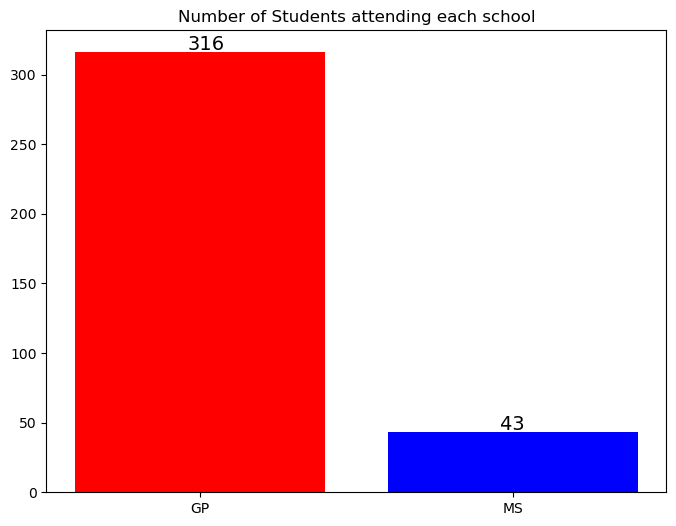

In [10]:
plt.figure(figsize= (8, 6))
bars = plt.bar(df['school'].value_counts().keys(), df['school'].value_counts().values, color= ['r', 'b'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title("Number of Students attending each school")
plt.show()

non-balanced in school attendance

## Sex

In [11]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

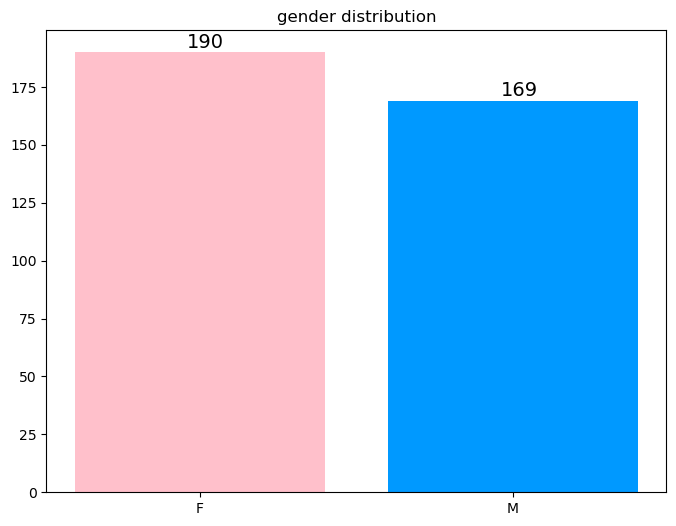

In [12]:
plt.figure(figsize= (8, 6))
bars = plt.bar(df['sex'].value_counts().keys(), df['sex'].value_counts().values, color= ['pink', '#0099ff'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title("gender distribution")
plt.show()

balanced in school attendance

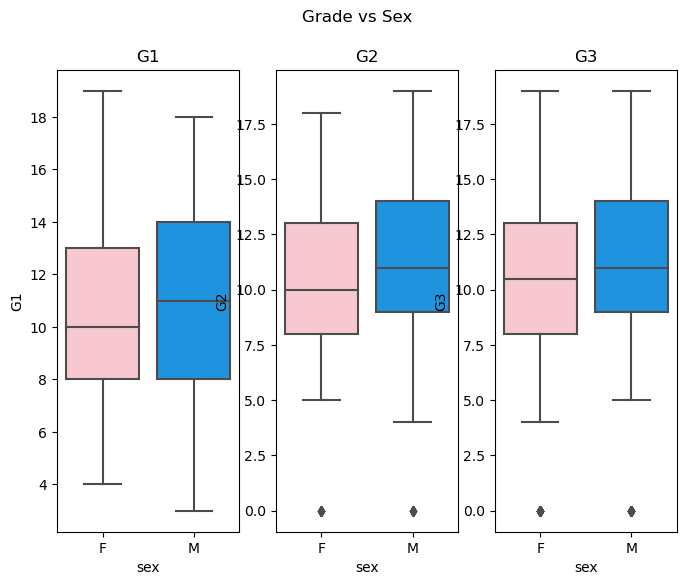

In [13]:
fig, axes = plt.subplots(1, 3, figsize= (8, 6))
plt.suptitle('Grade vs Sex')

ax1 = sns.boxplot(data= df, x= 'sex', y= 'G1', ax= axes[0], palette = {'F' : 'pink', 'M' : '#0099ff'})
ax1.set_title('G1')

ax2 = sns.boxplot(data= df, x= 'sex', y= 'G2', ax= axes[1], palette = {'F' : 'pink', 'M' : '#0099ff'})
ax2.set_title('G2')

ax3 = sns.boxplot(data= df, x= 'sex', y= 'G3', ax= axes[2], palette = {'F' : 'pink', 'M' : '#0099ff'})
ax3.set_title('G3')

plt.show()

**Men** doing slightly better

## Age

In [14]:
df['age'].unique()

array([18, 19, 16, 17, 15, 20, 21, 22], dtype=int64)

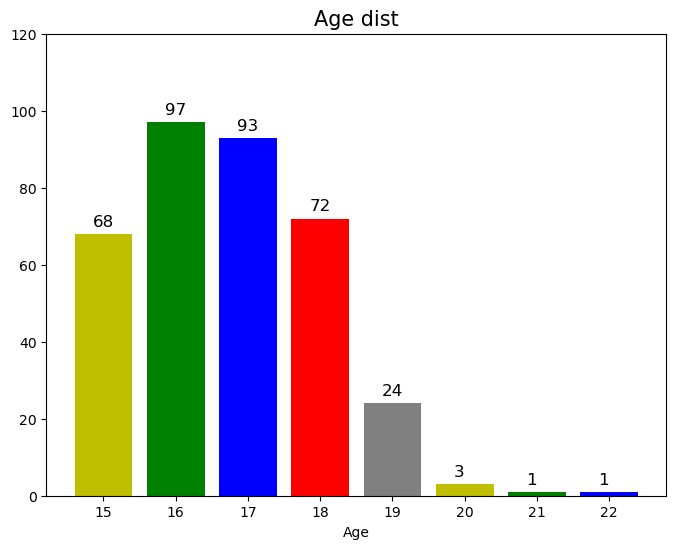

In [187]:
plt.figure(figsize= (8, 6))

bars = plt.bar(
    df['age'].value_counts().sort_index().keys(), 
    df['age'].value_counts().sort_index().values,
    color = ['y', 'g', 'b', 'r', 'gray']
)

for bar in bars:
  plt.text(bar.get_x() + 0.25, bar.get_height() + 2, bar.get_height(), fontsize= 12)

plt.ylim([0, 120])
plt.title('Age dist', fontsize= 15)
plt.xlabel('Age')
plt.show()

### Does Age have correlation with their grades?

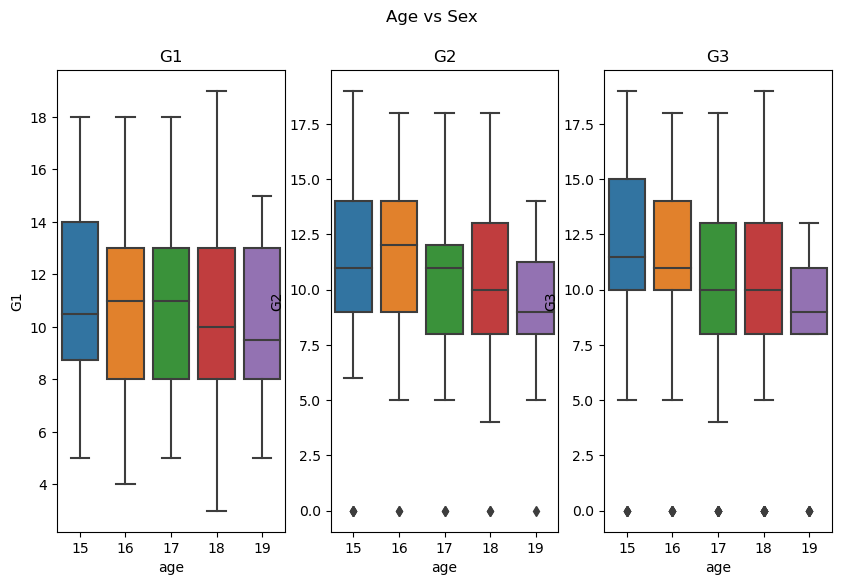

In [16]:
fig, axes = plt.subplots(1, 3, figsize= (10, 6))
fig.suptitle('Age vs Sex')

ax1 = sns.boxplot(data= df.query('age < 20'), x= 'age', y= 'G1', ax= axes[0])
ax1.set_title('G1')

ax2 = sns.boxplot(data= df.query('age < 20'), x= 'age', y= 'G2', ax= axes[1])
ax2.set_title('G2')

ax3 = sns.boxplot(data= df.query('age < 20'), x= 'age', y= 'G3', ax= axes[2])
ax3.set_title('G3')

plt.show()

it seems that **younger** ones are doing slightly better

## Address

In [17]:
df['address'].unique()

array(['U', 'R'], dtype=object)

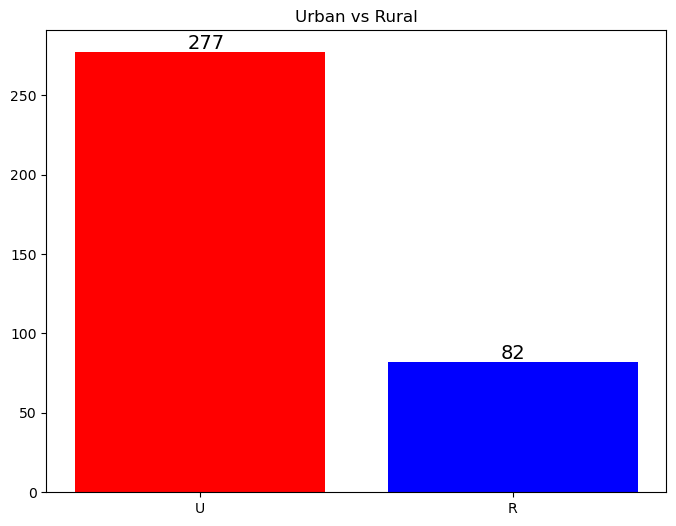

In [18]:
plt.figure(figsize= (8, 6))
bars = plt.bar(df['address'].value_counts().keys(), df['address'].value_counts().values, color= ['r', 'b'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title("Urban vs Rural")
plt.show()

**unbalanced** in terms of address

### Adress vs Grade?

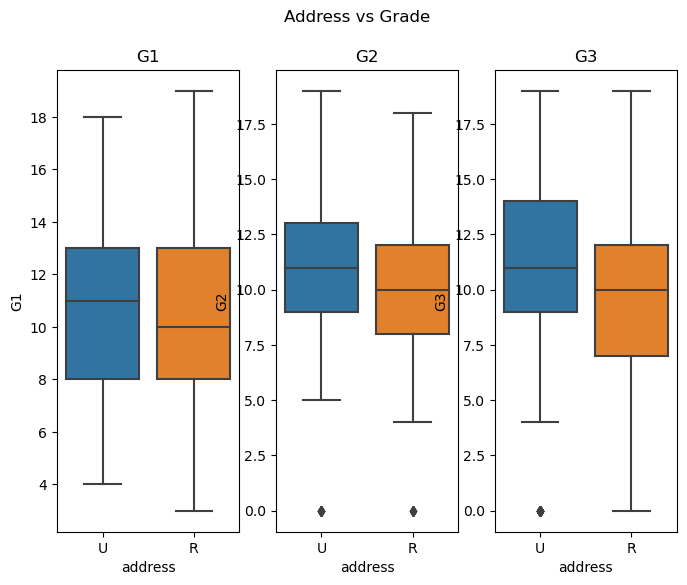

In [19]:
fig, axes = plt.subplots(1, 3, figsize= (8, 6))
fig.suptitle('Address vs Grade')

ax1 = sns.boxplot(data= df, x= 'address', y= 'G1', ax= axes[0])
ax1.set_title('G1')

ax2 = sns.boxplot(data= df, x= 'address', y= 'G2', ax= axes[1])
ax2.set_title('G2')

ax3 = sns.boxplot(data= df, x= 'address', y= 'G3', ax= axes[2])
ax3.set_title('G3')

plt.show()

it looks like **Urbans** do better

## famsize

In [20]:
df['famsize'].unique()

array(['LE3', 'GT3'], dtype=object)

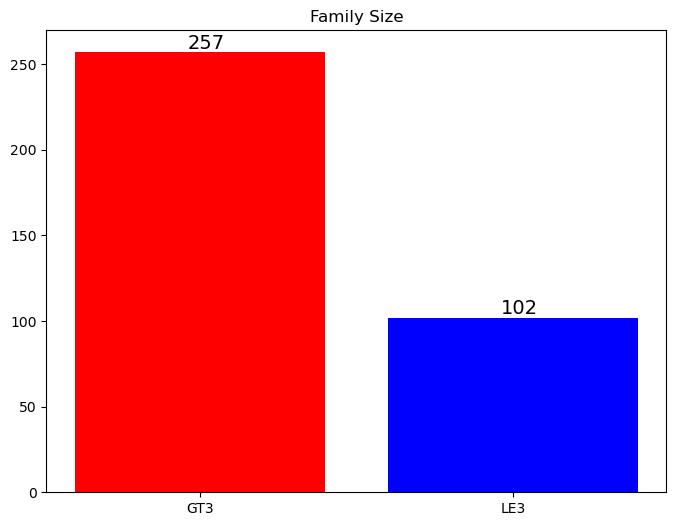

In [21]:
plt.figure(figsize= (8, 6))
bars = plt.bar(df['famsize'].value_counts().keys(), df['famsize'].value_counts().values, color= ['r', 'b'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title("Family Size")
plt.show()

### famsize vs grade

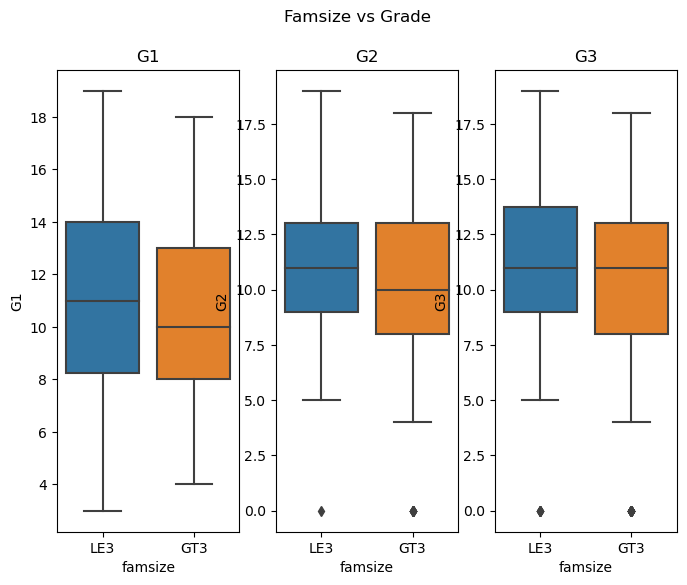

In [22]:
fig, axes = plt.subplots(1, 3, figsize= (8, 6))
fig.suptitle('Famsize vs Grade')

ax1 = sns.boxplot(data= df, x= 'famsize', y= 'G1', ax= axes[0])
ax1.set_title('G1')

ax2 = sns.boxplot(data= df, x= 'famsize', y= 'G2', ax= axes[1])
ax2.set_title('G2')

ax3 = sns.boxplot(data= df, x= 'famsize', y= 'G3', ax= axes[2])
ax3.set_title('G3')

plt.show()

**non-crowded** families seem to have a tiny advantage

## Pstatus

In [23]:
df['Pstatus'].unique()

array(['A', 'T'], dtype=object)

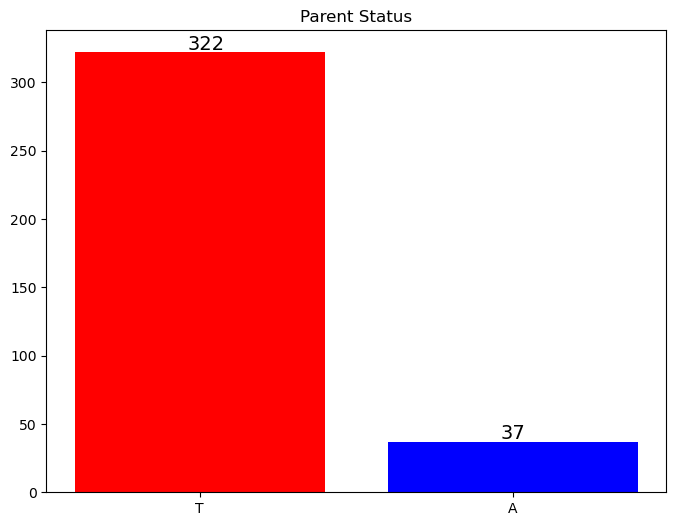

In [24]:
plt.figure(figsize= (8, 6))
bars = plt.bar(df['Pstatus'].value_counts().keys(), df['Pstatus'].value_counts().values, color= ['r', 'b'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title("Parent Status")
plt.show()

### Pstatus vs Grade

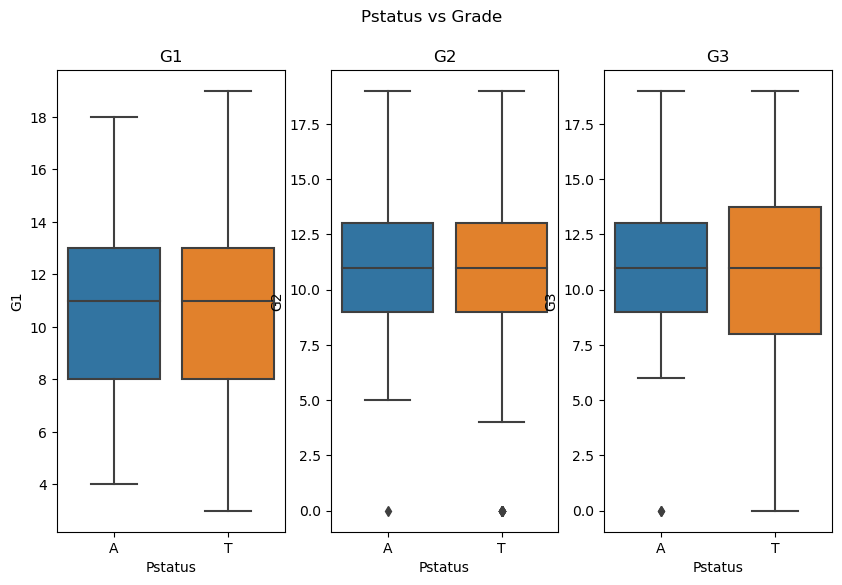

In [25]:
fig, axes = plt.subplots(1, 3, figsize= (10, 6))
fig.suptitle('Pstatus vs Grade')

ax1 = sns.boxplot(data= df, x= 'Pstatus', y= 'G1', ax= axes[0])
ax1.set_title('G1')

ax2 = sns.boxplot(data= df, x= 'Pstatus', y= 'G2', ax= axes[1])
ax2.set_title('G2')

ax3 = sns.boxplot(data= df, x= 'Pstatus', y= 'G3', ax= axes[2])
ax3.set_title('G3')

plt.show()

Pretty **Even**

In [26]:
df.groupby('Pstatus')[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
Pstatus,,,
A,10.810811,10.837838,10.864865
T,10.813665,10.639752,10.288820


## Medu & Fedu

In [175]:
df['Medu'].unique()
df['Medu'].value_counts()

4    120
2     92
3     90
1     54
0      3
Name: Medu, dtype: int64

In [28]:
df['Fedu'].unique()

array([4, 3, 2, 0, 1], dtype=int64)

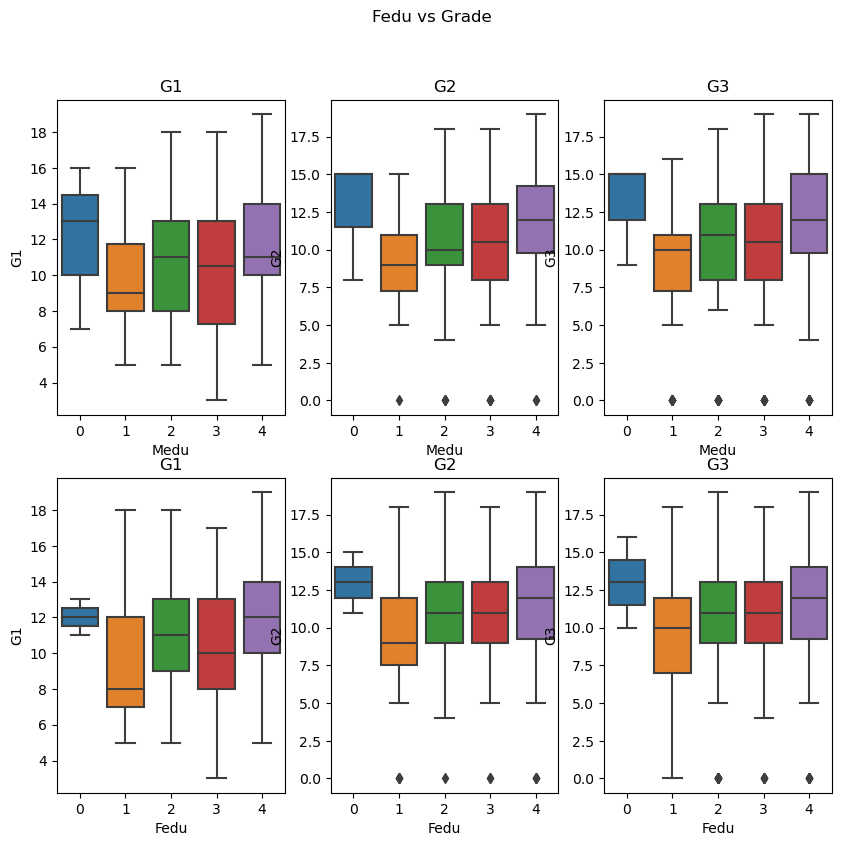

In [29]:
fig, axes = plt.subplots(2, 3, figsize= (10, 9))

plt.suptitle('Fedu vs Grade')

ax01 = sns.boxplot(data= df, x= 'Medu', y= 'G1', ax= axes[0][0])
ax01.set_title('G1')

ax02 = sns.boxplot(data= df, x= 'Medu', y= 'G2', ax= axes[0][1])
ax02.set_title('G2')

ax03 = sns.boxplot(data= df, x= 'Medu', y= 'G3', ax= axes[0][2])
ax03.set_title('G3')

ax1 = sns.boxplot(data= df, x= 'Fedu', y= 'G1', ax= axes[1][0])
ax1.set_title('G1')

ax2 = sns.boxplot(data= df, x= 'Fedu', y= 'G2', ax= axes[1][1])
ax2.set_title('G2')

ax3 = sns.boxplot(data= df, x= 'Fedu', y= 'G3', ax= axes[1][2])
ax3.set_title('G3')

plt.show()

## Mjob & Fjob

In [30]:
df['Mjob'].unique()

array(['health', 'teacher', 'other', 'services', 'at_home'], dtype=object)

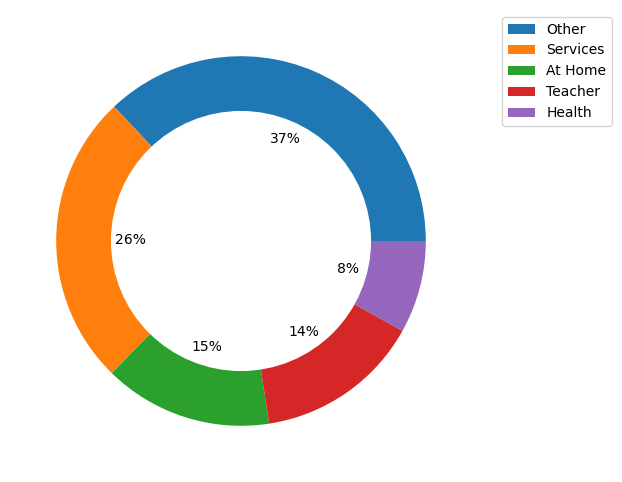

In [31]:
plt.figure(figsize= (10, 6))

labels= ['Other', 'Services', 'At Home', 'Teacher', 'Health']

plt.pie(df['Mjob'].value_counts(normalize= True), autopct= '%.0f%%')
plt.legend(labels, bbox_to_anchor= (1.05, 1))
my_circle = plt.Circle((0, 0), 0.7, color='white')

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

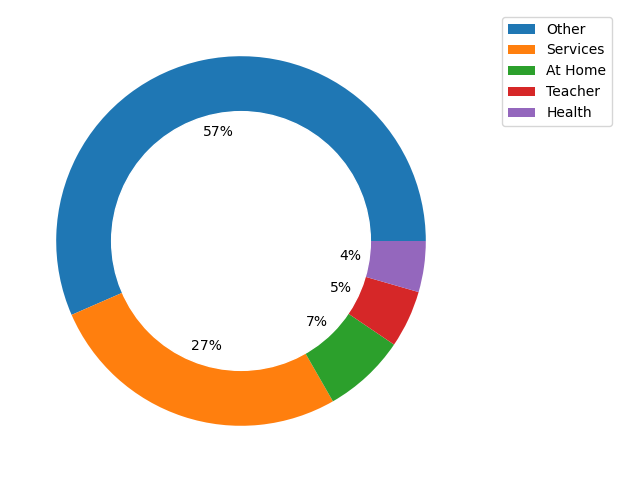

In [32]:
plt.figure(figsize= (10, 6))

labels= ['Other', 'Services', 'At Home', 'Teacher', 'Health']

plt.pie(df['Fjob'].value_counts(normalize= True), autopct= '%.0f%%')
plt.legend(labels, bbox_to_anchor= (1.05, 1))
my_circle = plt.Circle((0, 0), 0.7, color='white')

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## studytime

In [33]:
df['studytime'].unique()

array([2, 1, 3, 4], dtype=int64)

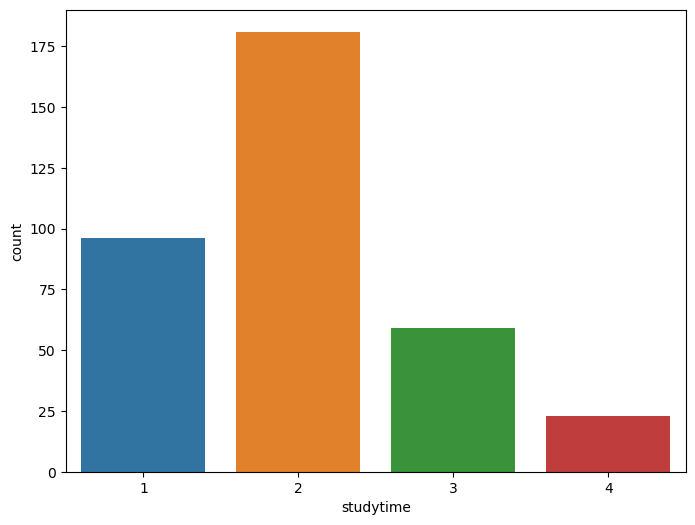

In [34]:
plt.figure(figsize= (8, 6))
sns.countplot(data= df, x= 'studytime')
plt.show()

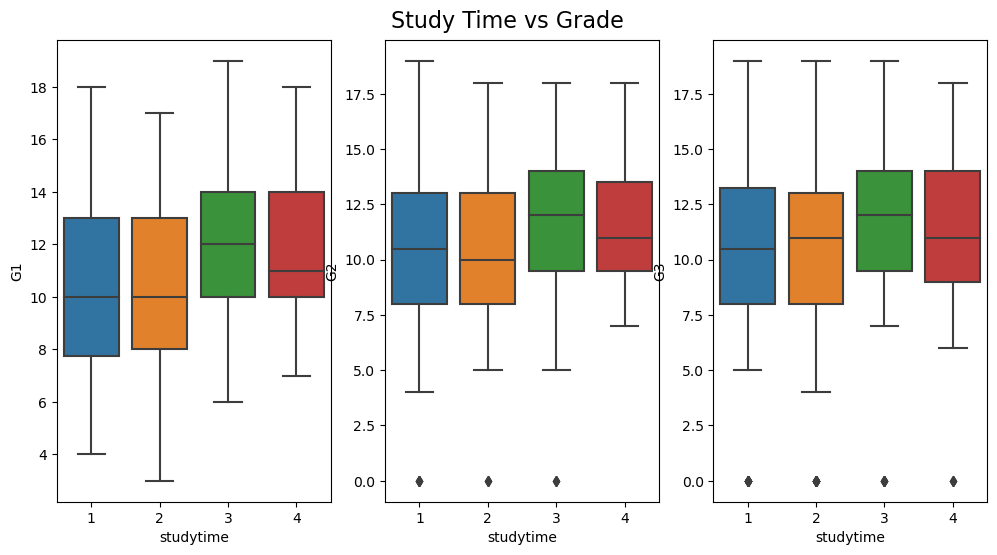

In [35]:
fig, axes = plt.subplots(1, 3, figsize= (12, 6))
plt.suptitle('Study Time vs Grade', fontsize= 16, y= 0.93)

sns.boxplot(data= df, x= 'studytime', y= 'G1', ax= axes[0])
sns.boxplot(data= df, x= 'studytime', y= 'G2', ax= axes[1])
sns.boxplot(data= df, x= 'studytime', y= 'G3', ax= axes[2])

plt.show()

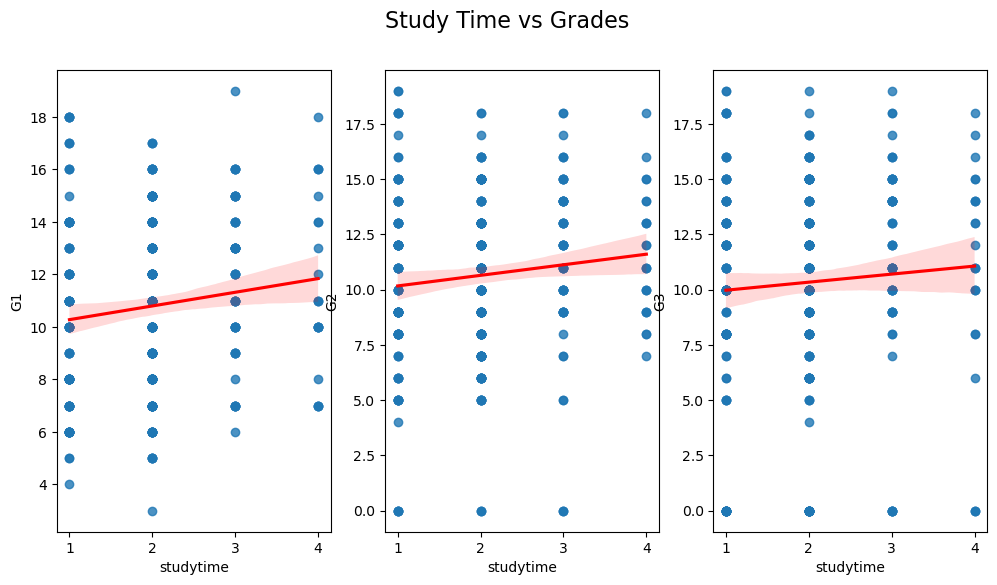

In [36]:
fig, axes = plt.subplots(1, 3, figsize= (12, 6))

plt.suptitle('Study Time vs Grades', fontsize= 16)

ax1 = sns.regplot(data = df, x= 'studytime', y= 'G1', ax= axes[0], line_kws= {'color': 'red'})
ax2 = sns.regplot(data = df, x= 'studytime', y= 'G2', ax= axes[1], line_kws= {'color': 'red'})
ax3 = sns.regplot(data = df, x= 'studytime', y= 'G3', ax= axes[2], line_kws= {'color': 'red'})

plt.show()

## Higher (Education)

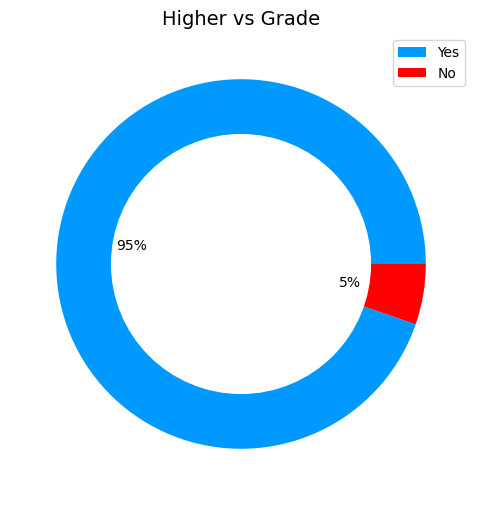

In [37]:
plt.figure(figsize= (10, 6))

labels= ['Yes', 'No']
plt.pie(df['higher'].value_counts(normalize= True), autopct= '%.0f%%', colors= ['#0099ff', 'r'])

plt.title('Higher vs Grade', fontsize= 14)
plt.legend(['Yes', 'No'])

my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### Higher vs Grade

In [38]:
pd.DataFrame(df.groupby('higher')[['G1', 'G2', 'G3']].mean().round(1))

,G1,G2,G3
higher,,,
no,8.3,7.7,6.6
yes,11.0,10.8,10.6


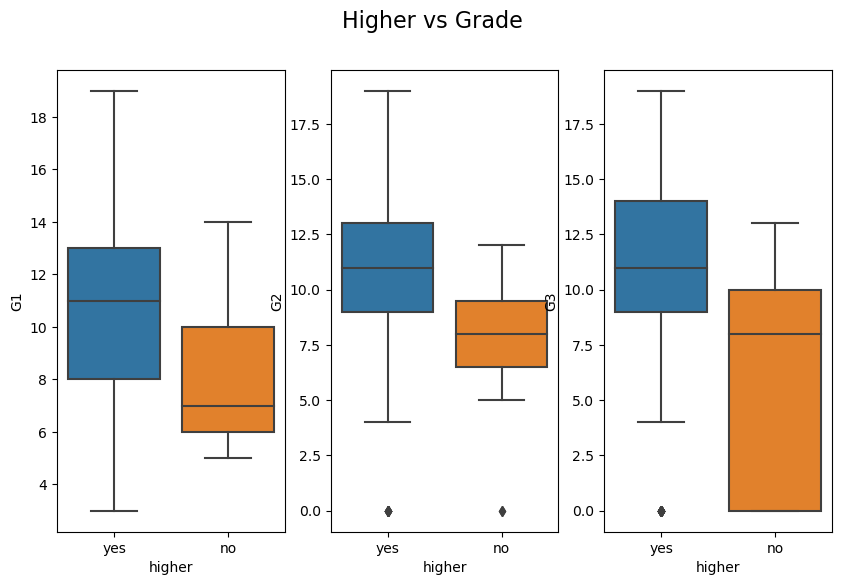

In [39]:
fig, axes = plt.subplots(1, 3, figsize= (10, 6))
plt.suptitle('Higher vs Grade', fontsize= 16)

ax1 = sns.boxplot(data= df, x= 'higher', y= 'G1', ax= axes[0])
ax2 = sns.boxplot(data= df, x= 'higher', y= 'G2', ax= axes[1])
ax3 = sns.boxplot(data= df, x= 'higher', y= 'G3', ax= axes[2])

plt.show()

Obviously Better result for **"YES"**

## Freetime & Internet

In [40]:
pd.DataFrame(df.groupby('internet')['freetime'].mean().round(2))

,freetime
internet,
no,3.08
yes,3.26


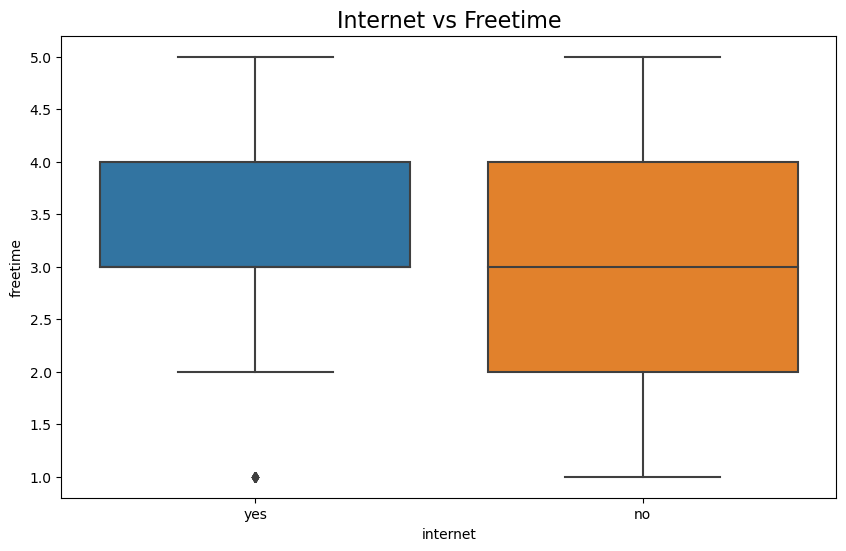

In [41]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x = 'internet', y = 'freetime')

plt.title('Internet vs Freetime', fontsize= 16)
plt.show()

## Romantic

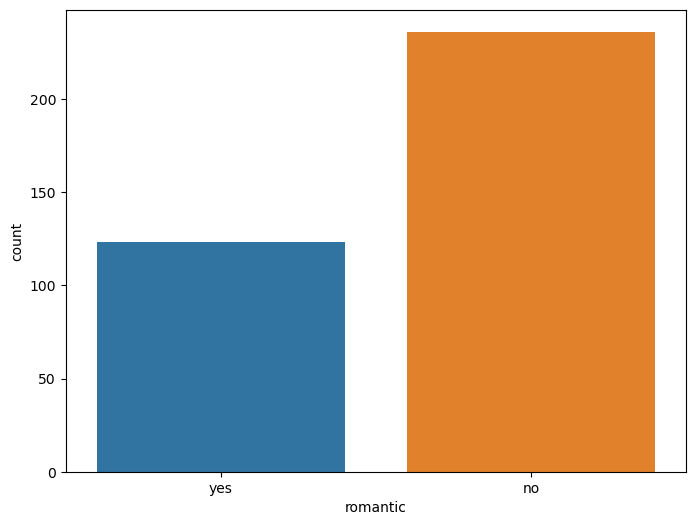

In [42]:
plt.figure(figsize= (8, 6))
sns.countplot(data= df, x= 'romantic')
plt.show()

In [43]:
pd.crosstab(df.query('romantic == "yes"')['sex'], df['romantic'])

romantic,yes
sex,
F,75
M,48


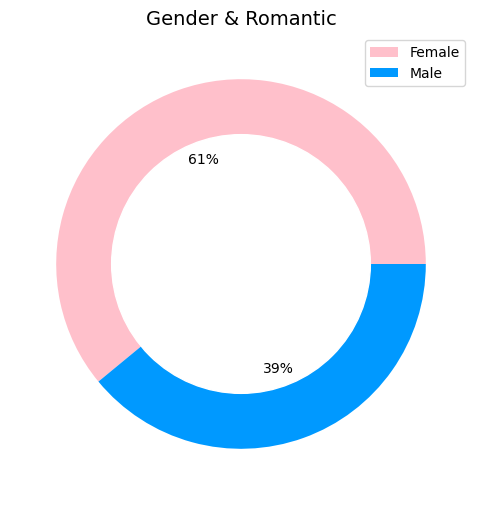

In [44]:
plt.figure(figsize= (8, 6))

labels= ['Female', 'Male'] 

plt.pie(df.query('romantic == "yes"')['sex'].value_counts(normalize= True), autopct= '%.0f%%', colors= ['pink', '#0099ff'])
plt.title('Gender & Romantic', fontsize= 14)
plt.legend(labels, loc= 'upper right')

my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

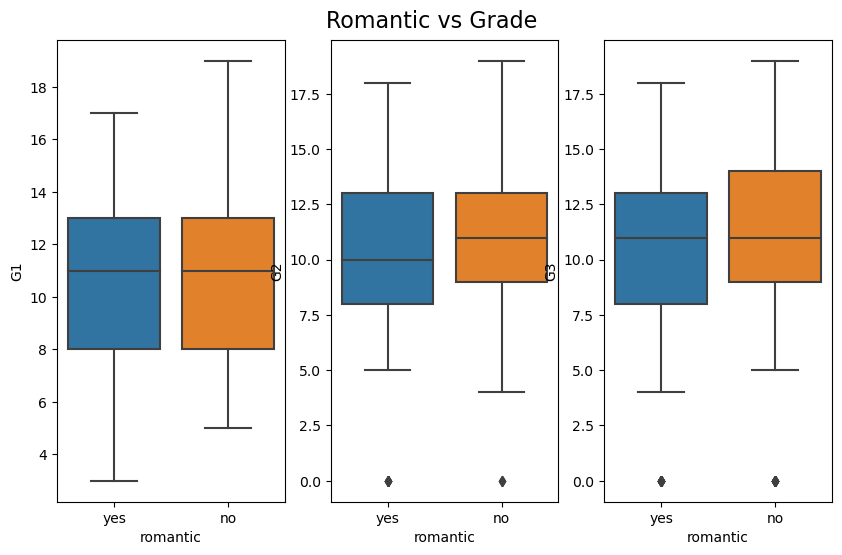

In [45]:
fig, axes = plt.subplots(1, 3, figsize= (10, 6))

plt.suptitle('Romantic vs Grade', fontsize= 16, y= 0.93)

sns.boxplot(data= df, x= 'romantic', y= 'G1', ax= axes[0])
sns.boxplot(data= df, x= 'romantic', y= 'G2', ax= axes[1])
sns.boxplot(data= df, x= 'romantic', y= 'G3', ax= axes[2])

plt.show()

## Reasons

In [46]:
df['reason'].unique()

array(['home', 'course', 'reputation', 'other'], dtype=object)

D:\Program Files\Anaconda\lib\site-packages\seaborn\categorical.py:3543: UserWarning:

5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

D:\Program Files\Anaconda\lib\site-packages\seaborn\categorical.py:3543: UserWarning:

8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



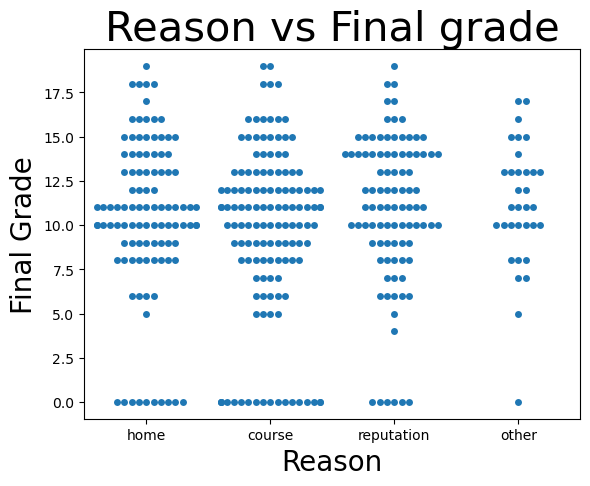

In [47]:
b = sns.swarmplot(x='reason', y='G3', data=df)
b.axes.set_title('Reason vs Final grade', fontsize = 30)

b.set_xlabel('Reason', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)

plt.show()

## Final Grades

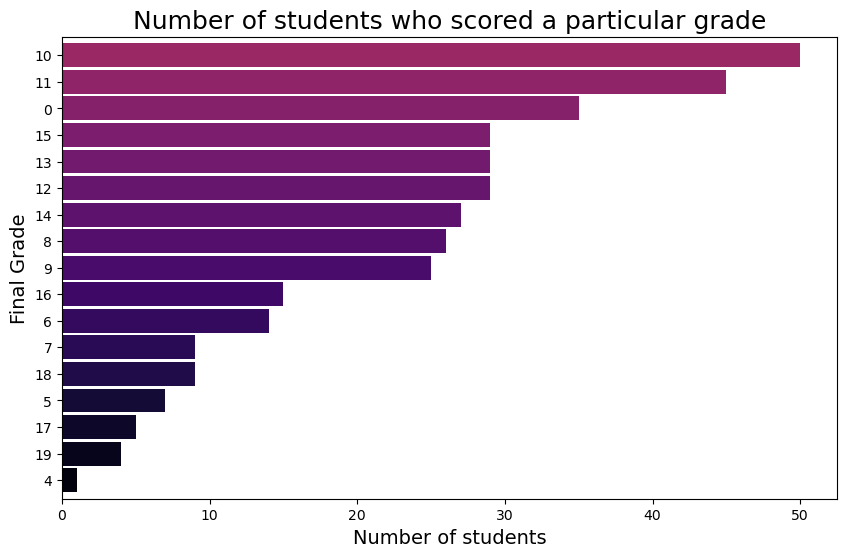

In [48]:
plt.subplots(figsize=(10,6))
grade_counts = df['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=18)
grade_counts.set_xlabel('Number of students', fontsize=14)
grade_counts.set_ylabel('Final Grade', fontsize=14)
plt.show()

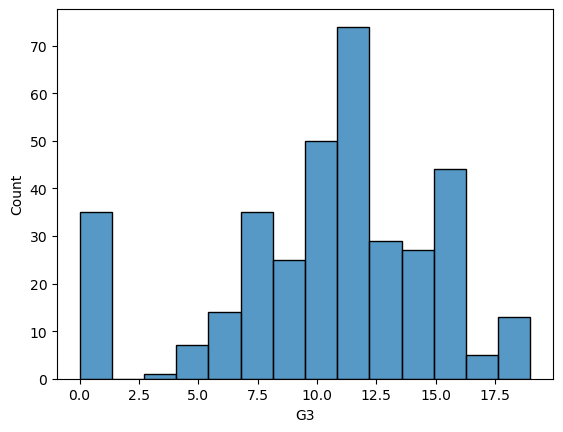

In [49]:
sns.histplot(df['G3'])
plt.show()

In [50]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

<AxesSubplot:>

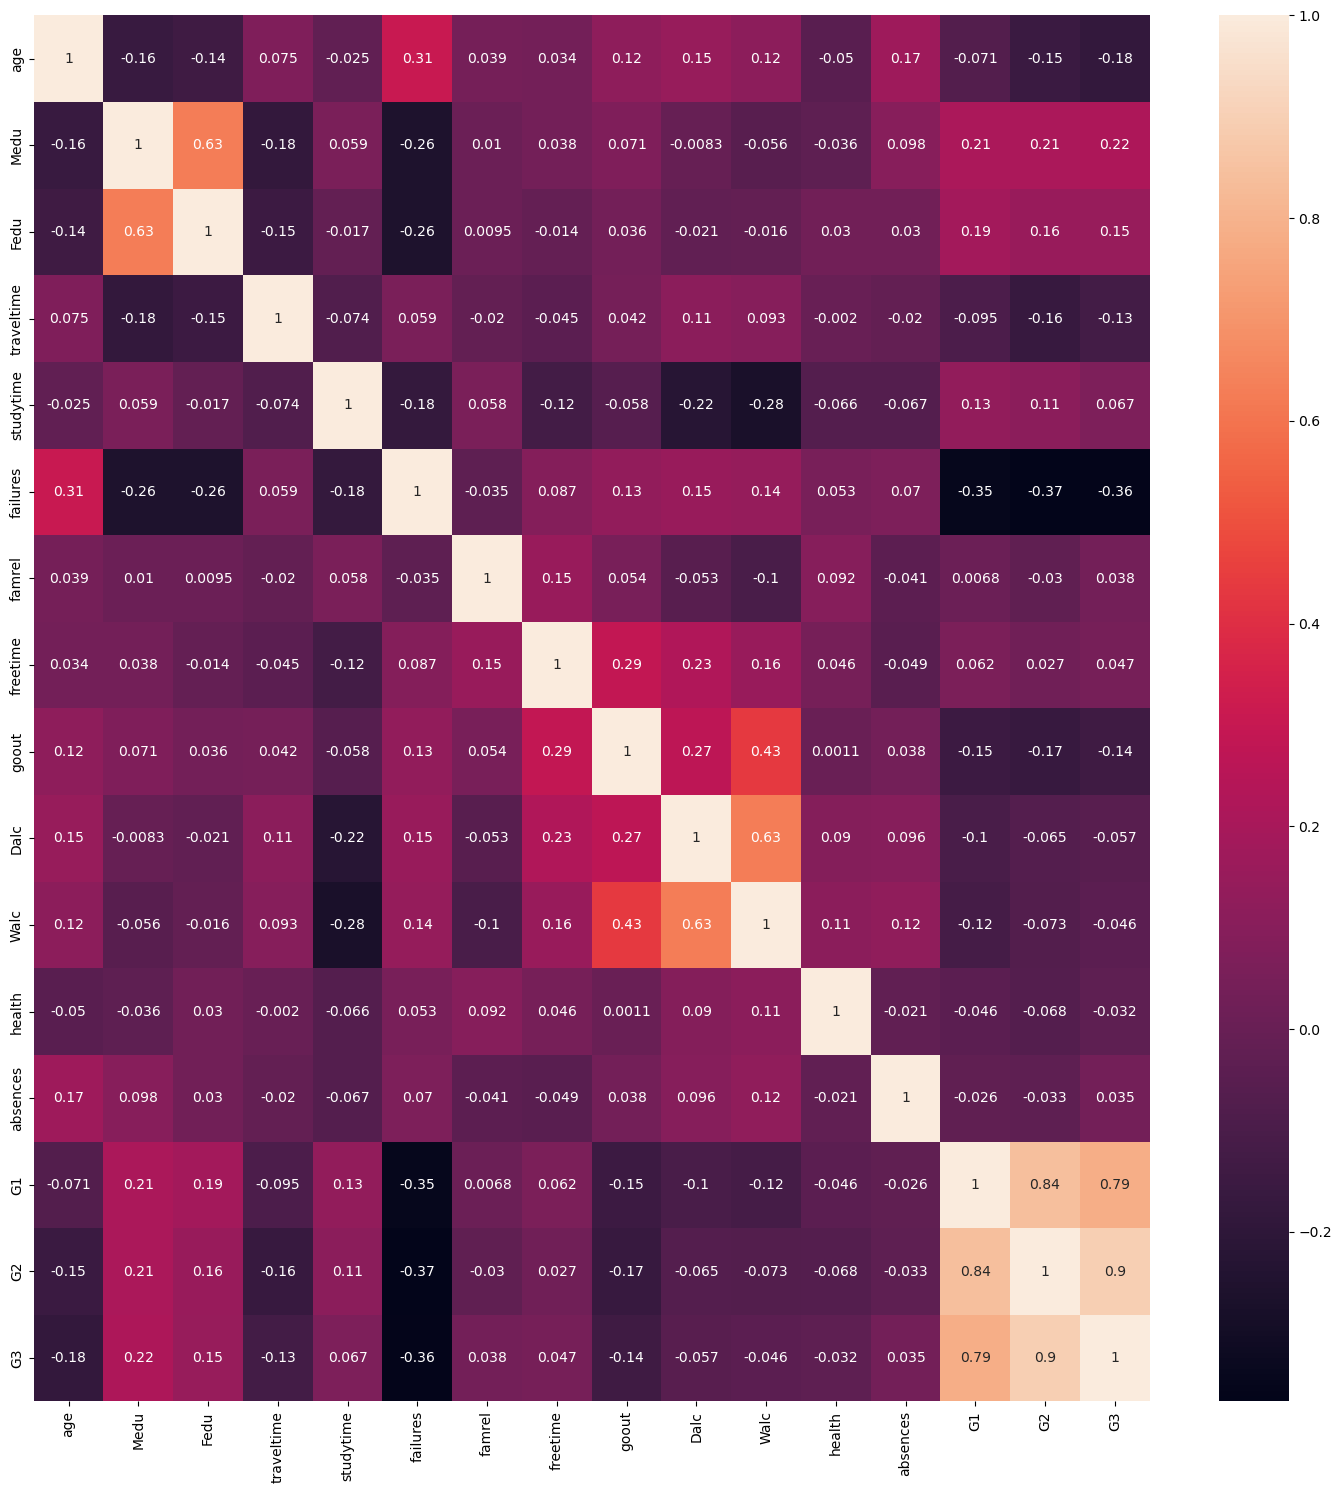

In [51]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cbar=True)

# Encoding (Categorical to Numerical)

In [52]:
category_df = df.select_dtypes(include=['object'])

dummy_df = pd.get_dummies(category_df)
dummy_df['G3'] = df['G3']

dummy_df.corr()['G3'].sort_values()

higher_no           -0.193968
Mjob_at_home        -0.151610
romantic_yes        -0.129356
reason_course       -0.116778
address_R           -0.109209
sex_F               -0.107380
paid_no             -0.096927
famsize_GT3         -0.094748
guardian_other      -0.089315
Mjob_other          -0.081892
schoolsup_yes       -0.080794
internet_no         -0.075973
nursery_no          -0.069944
famsup_yes          -0.054297
school_MS           -0.049190
Fjob_at_home        -0.043023
Pstatus_T           -0.038667
Fjob_other          -0.034343
activities_no       -0.017568
Fjob_services       -0.013097
reason_home          0.014297
activities_yes       0.017568
guardian_mother      0.021234
guardian_father      0.036482
Pstatus_A            0.038667
school_GP            0.049190
Fjob_health          0.051941
famsup_no            0.054297
reason_other         0.056427
Mjob_teacher         0.066214
nursery_yes          0.069944
reason_reputation    0.075914
internet_yes         0.075973
schoolsup_

In [53]:
labels = df['G3']    
df = pd.get_dummies(df)

In [54]:
most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:15]
most_correlated

G3               1.000000
G2               0.897952
G1               0.786249
failures         0.359644
Medu             0.218954
higher_yes       0.193968
higher_no        0.193968
age              0.181417
Mjob_at_home     0.151610
Fedu             0.147708
goout            0.140939
romantic_no      0.129356
romantic_yes     0.129356
traveltime       0.125185
reason_course    0.116778
Name: G3, dtype: float64

In [55]:
df = df.loc[:, most_correlated.index]
df.head()

,G3,G2,G1,failures,Medu,higher_yes,higher_no,age,Mjob_at_home,Fedu,goout,romantic_no,romantic_yes,traveltime,reason_course
0,11,10,12,0,4,1,0,18,0,4,4,0,1,1,0
1,10,9,8,0,4,1,0,18,0,4,3,1,0,1,1
2,13,14,15,1,3,1,0,19,0,3,4,0,1,1,0
3,11,12,11,0,3,1,0,16,0,3,3,1,0,1,0
4,0,8,7,0,3,1,0,17,0,2,2,0,1,1,0


In [56]:
df.drop('higher_no', axis = 1, inplace = True)

# Scaling

In [184]:
sX = StandardScaler()
sY = StandardScaler()

X_train = sX.fit_transform(X_train)
y_train = sY.fit_transform(np.array(y_train).reshape(-1, 1))

# Modeling

## Input-Target Split

In [135]:
y = df['G3']
X = df.drop('G3', axis = 1)

## Train-Test Split

In [136]:
k_fold = KFold(n_splits=10, random_state=10, shuffle=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((287, 13), (72, 13), (287,), (72,))

In [58]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'RandromForest': RandomForestRegressor(n_estimators=100),
    'GradientBoost': GradientBoostingRegressor(n_estimators=100),
    'SVM' : SVR()
}

In [66]:
for key, clf in regressors.items():
    #clf.fit(X_train, y_train)
    score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
    
    rmse = np.sqrt(-score)
    rmse_score = round(np.mean(rmse), 2)
    
    print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

RMSE score with CV of Linear Regression is 1.88
RMSE score with CV of Lasso is 1.82
RMSE score with CV of Ridge is 1.87
RMSE score with CV of ElasticNet is 1.82
RMSE score with CV of RandromForest is 2.08
RMSE score with CV of GradientBoost is 2.11
RMSE score with CV of SVM is 1.98


## Hyperparameter Tuning using GridSearch

In [67]:
clf = GradientBoostingRegressor()
params = {
    'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[4,5,6,7]
}
gs = GridSearchCV(estimator=clf, param_grid=params, cv=k_fold, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'max_features': [4, 5, 6, 7],
                         'max_leaf_nodes': [3, 5, 7, 9],
                         'min_samples_split': [5, 9, 13]},
             scoring='neg_mean_squared_error')

In [68]:
gb_clf = gs.best_estimator_

In [69]:
gb_clf.fit(X_train, y_train)
y_predict = gb_clf.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
rmse

2.371492769345722

In [157]:
lasso_alphas = np.linspace(0, 0.2, 21)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV(
    lasso, grid, scoring='neg_mean_absolute_error',
    cv=cv, n_jobs=-1)
results = gscv.fit(X_train, y_train)

In [158]:
rmse = np.sqrt(-results.best_score_)
rmse

0.48908216179792136

In [134]:
X_test = sX.inverse_transform(X_test)

ValueError: non-broadcastable output operand with shape (72,1) doesn't match the broadcast shape (72,13)

In [162]:
y_test = sY.transform(np.array(y_test).reshape(-1,1))

In [163]:
y_predict_lasso = results.predict(X_test)

mse = mean_squared_error(y_test, y_predict_lasso)
rmse = np.sqrt(mse)
rmse

0.48658335014103227

In [160]:
y_predict_lasso

array([ 1.17761624,  0.60086933,  0.87190582, -1.35333254,  0.85590346,
        0.32317591, -1.10840077,  0.87384506,  1.38003482, -0.36317925,
       -0.06951042,  0.13913202, -0.70717218, -0.82491657, -0.11590211,
        1.61518809, -0.3651185 ,  0.30135581,  1.61712733, -0.64237884,
        0.07051411,  0.6250348 , -1.6586638 , -0.64431808, -1.02503343,
       -0.17676303, -0.34289228,  0.13716581,  1.10665297,  0.4101685 ,
        0.64297641,  0.94286909,  0.60280858, -0.57998479,  0.41639236,
       -0.96411858,  0.85590346,  0.1430105 , -0.64431808, -0.62209186,
       -0.66072657, -1.10217691, -0.64043959, -0.13424984,  0.56848685,
       -0.37134235,  0.91441902,  0.32942672, -0.11396286,  0.88006892,
        0.59658472,  0.13872589,  0.28300808, -0.15456377, -1.63059289,
        0.11456043, -2.65392423,  1.61322188, -0.87947135, -0.64472421,
        0.43474009, -0.12215292,  0.92064287, -0.32688991,  0.91441902,
       -1.3595564 ,  0.6250348 , -0.60221101,  0.91441902, -0.34

In [167]:
y_pred_lasso_test = results.predict(df_test)
y_pred_lasso_test = sY.inverse_transform(np.array(y_pred_lasso_test).reshape(-1,1))

In [168]:
y_pred_lasso_test

array([[ 9.1092701 ],
       [11.61735025],
       [ 1.53091181],
       [ 8.939088  ],
       [16.25141686],
       [11.76851673],
       [17.13493515],
       [12.69996018],
       [ 8.2958131 ],
       [ 7.39913664],
       [ 8.62071742],
       [ 8.3131966 ],
       [14.46699677],
       [10.08023319],
       [ 8.65836386],
       [15.51647183],
       [ 7.4296783 ],
       [17.24398878],
       [10.17190332],
       [11.69869651],
       [12.67811027],
       [16.99505363],
       [ 8.35694157],
       [11.80775014],
       [14.5586669 ],
       [15.37659031],
       [ 1.65600305],
       [10.00594655],
       [16.24272511],
       [ 9.71653067],
       [18.04452869],
       [ 9.21409839],
       [14.56735865],
       [ 8.37432507],
       [ 9.12242826],
       [ 6.83629733]])

# DeepLearning with Keras

In [93]:
def build_regressor():
    regressor = Sequential()
    
    regressor.add(Dense(units=13, input_dim=13, activation='relu'))
    regressor.add(Dense(units=32, activation='relu'))
    regressor.add(Dense(units=1))
    
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])
    return regressor

In [94]:
regressor = KerasRegressor(build_fn=build_regressor, batch_size=20, epochs=100)

In [96]:
X_train.shape

(287, 13)

In [97]:
y_train.shape

(287, 1)

In [138]:
results = regressor.fit(X_train, y_train)

Epoch 1/100
287/287 [==============================] - 0s 278us/sample - loss: 1.5725 - mean_absolute_error: 0.9176
Epoch 2/100
287/287 [==============================] - 0s 66us/sample - loss: 1.1462 - mean_absolute_error: 0.7852
Epoch 3/100
287/287 [==============================] - 0s 66us/sample - loss: 0.9216 - mean_absolute_error: 0.7051
Epoch 4/100
287/287 [==============================] - 0s 87us/sample - loss: 0.7744 - mean_absolute_error: 0.6430
Epoch 5/100
287/287 [==============================] - 0s 66us/sample - loss: 0.6685 - mean_absolute_error: 0.5969
Epoch 6/100
287/287 [==============================] - 0s 80us/sample - loss: 0.5870 - mean_absolute_error: 0.5571
Epoch 7/100
287/287 [==============================] - 0s 69us/sample - loss: 0.5152 - mean_absolute_error: 0.5217
Epoch 8/100
287/287 [==============================] - 0s 73us/sample - loss: 0.4603 - mean_absolute_error: 0.4910
Epoch 9/100
287/287 [==============================] - 0s 66us/sample - loss: 0

287/287 [==============================] - 0s 45us/sample - loss: 0.1022 - mean_absolute_error: 0.2110
Epoch 72/100
287/287 [==============================] - 0s 45us/sample - loss: 0.1003 - mean_absolute_error: 0.2152
Epoch 73/100
287/287 [==============================] - 0s 56us/sample - loss: 0.0992 - mean_absolute_error: 0.2143
Epoch 74/100
287/287 [==============================] - 0s 49us/sample - loss: 0.0977 - mean_absolute_error: 0.2106
Epoch 75/100
287/287 [==============================] - 0s 49us/sample - loss: 0.0958 - mean_absolute_error: 0.2067
Epoch 76/100
287/287 [==============================] - 0s 45us/sample - loss: 0.0958 - mean_absolute_error: 0.2089
Epoch 77/100
287/287 [==============================] - 0s 45us/sample - loss: 0.0960 - mean_absolute_error: 0.2144
Epoch 78/100
287/287 [==============================] - 0s 49us/sample - loss: 0.0940 - mean_absolute_error: 0.2090
Epoch 79/100
287/287 [==============================] - 0s 49us/sample - loss: 0.0940

In [183]:
X_test = sX.transform(X_test)
y_test = sY.transform(np.array(y_test).reshape(-1,1))

In [143]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.5224088482504782

In [185]:
y_pred = sY.inverse_transform(np.array(y_pred).reshape(-1, 1))
y_test = sY.inverse_transform(np.array(y_test).reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

ValueError: Found input variables with inconsistent numbers of samples: [72, 36]

In [186]:
y_pred

array([[ 6.390101 ],
       [11.08046  ],
       [ 1.7019367],
       [ 8.491486 ],
       [16.9948   ],
       [12.5016165],
       [16.803936 ],
       [12.262657 ],
       [ 7.5573683],
       [ 5.5829096],
       [ 7.469125 ],
       [ 8.5921755],
       [15.580051 ],
       [10.874412 ],
       [ 7.643655 ],
       [16.868248 ],
       [ 6.385201 ],
       [17.847935 ],
       [ 8.975434 ],
       [12.644405 ],
       [12.829764 ],
       [16.957159 ],
       [ 7.243125 ],
       [12.203455 ],
       [15.865335 ],
       [15.965296 ],
       [ 4.7458477],
       [ 8.089212 ],
       [15.773909 ],
       [ 6.184308 ],
       [18.392338 ],
       [10.076901 ],
       [16.256508 ],
       [ 9.604957 ],
       [ 9.443379 ],
       [ 6.26619  ]], dtype=float32)

# Deployment

In [101]:
df_test = pd.read_csv('test.csv')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,M,15,R,GT3,T,2,1,health,services,...,yes,5,4,2,1,1,5,8,9,9
1,GP,F,18,U,LE3,T,2,1,services,at_home,...,yes,5,4,3,1,1,5,12,12,12
2,GP,M,16,U,LE3,T,1,2,other,other,...,no,4,4,4,2,4,5,0,7,0
3,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,0,7,9
4,GP,F,17,U,GT3,T,3,2,health,health,...,no,5,2,2,1,2,5,0,17,17


In [102]:
df.head()

,G3,G2,G1,failures,Medu,higher_yes,age,Mjob_at_home,Fedu,goout,romantic_no,romantic_yes,traveltime,reason_course
0,11,10,12,0,4,1,18,0,4,4,0,1,1,0
1,10,9,8,0,4,1,18,0,4,3,1,0,1,1
2,13,14,15,1,3,1,19,0,3,4,0,1,1,0
3,11,12,11,0,3,1,16,0,3,3,1,0,1,0
4,0,8,7,0,3,1,17,0,2,2,0,1,1,0


In [105]:
df_test = pd.get_dummies(df_test)
df_test.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,15,2,1,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,0,1
1,18,2,1,1,2,1,5,4,3,1,...,1,0,0,1,0,1,0,1,0,1
2,16,1,2,2,1,1,4,4,4,2,...,0,1,0,1,0,1,1,0,1,0
3,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,1,0,1,1,0
4,17,3,2,1,4,0,5,2,2,1,...,0,1,1,0,0,1,0,1,1,0


In [148]:
df_test.shape

(36, 13)

In [149]:
df_test = df_test[X.columns]

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [150]:
df_test.shape


(36, 13)

In [152]:
df_test = sX.transform(df_test)

In [ ]:
# ss.inverse_transform(np.array(y_pred_lasso_test).reshape(-1,1))

In [169]:
y_pred = regressor.predict(df_test)
y_pred = sY.inverse_transform(np.array(y_pred).reshape(-1, 1))
y_pred

array([[ 6.390101 ],
       [11.08046  ],
       [ 1.7019367],
       [ 8.491486 ],
       [16.9948   ],
       [12.5016165],
       [16.803936 ],
       [12.262657 ],
       [ 7.5573683],
       [ 5.5829096],
       [ 7.469125 ],
       [ 8.5921755],
       [15.580051 ],
       [10.874412 ],
       [ 7.643655 ],
       [16.868248 ],
       [ 6.385201 ],
       [17.847935 ],
       [ 8.975434 ],
       [12.644405 ],
       [12.829764 ],
       [16.957159 ],
       [ 7.243125 ],
       [12.203455 ],
       [15.865335 ],
       [15.965296 ],
       [ 4.7458477],
       [ 8.089212 ],
       [15.773909 ],
       [ 6.184308 ],
       [18.392338 ],
       [10.076901 ],
       [16.256508 ],
       [ 9.604957 ],
       [ 9.443379 ],
       [ 6.26619  ]], dtype=float32)

In [128]:
type(y_pred)

numpy.ndarray

In [171]:
pred = pd.DataFrame(y_pred)
pred

,0
0,6.390101
1,11.080460
2,1.701937
3,8.491486
4,16.994801
5,12.501616
6,16.803936
7,12.262657
8,7.557368
9,5.582910


In [172]:
pred.to_csv('prediction.csv', index = False)

In [173]:
test = pd.read_csv('prediction.csv')
test

,0
0,6.390101
1,11.080460
2,1.701937
3,8.491486
4,16.994800
5,12.501617
6,16.803936
7,12.262657
8,7.557368
9,5.582910


In [174]:
pd.DataFrame(y_pred_lasso_test).to_csv('lasso_pred.csv', index = False)